In [278]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import math
import cv2
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(os.getcwd()+'\\..\\scripts\\')

from MNGFeaturesRegions import MNGFeaturesRegions
from MNGFeaturesMeans import MNGFeaturesMeans
from MNGFeaturesGradient import MNGFeaturesGradient
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
data = pd.read_csv('C:\\Users\\DaniR\\Desktop\\mng\\results\\dados_reais_predict.csv', sep=';', index_col=0)

In [164]:
y_real = data['time_real'].apply(lambda x: 1 if x >=160 else 0)
y_scores = data['time_predict'].apply(lambda x: 1 if x>=160 else 0)

In [165]:
confusion_matrix(y_real, y_scores)

array([[531,   9],
       [ 51,  69]], dtype=int64)

In [166]:
roc_auc_score(y_real, y_scores)

0.7791666666666666

In [167]:
fpr, tpr, thresholds = roc_curve(y_real, y_scores)

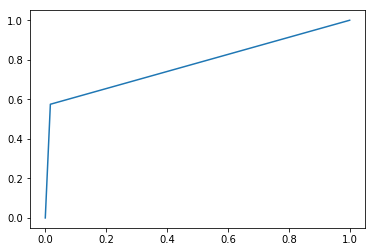

In [169]:
plt.plot(fpr, tpr)

In [174]:
path = 'C:\\Users\\DaniR\\Desktop\\mng\\preprocessadas'
files = os.listdir(path)

In [212]:
img = cv2.imread(path+'\\'+files[320])

In [283]:
mns = MNGFeaturesMeans()
reg = MNGFeaturesGradient()

In [287]:
box = reg.longitudinal_gradient(img)

In [365]:
img.shape

(2866, 1725, 3)

In [383]:
M = cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),-ang,1)

In [384]:
dst = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))

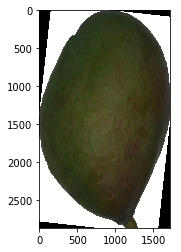

In [385]:
plt.imshow(dst)

In [376]:
img.shape[0]

2866